
    # Machine Learning Project: Salary Prediction for TechWorks Consulting

    ## Problem Statement
    Create a machine learning model which will help the company in determining the salary of newly hired employees using the given data.

    ## Data Preprocessing
    1. **Converting City Field**: The 'City' field was converted into numerical data, where metro cities were represented as 1 and non-metro cities as 0.
    2. **Mapping Colleges to Tiers**: The 'College' field was mapped to numerical values based on the tier system, with Tier 1 as the highest.
    3. **Dummy Variables for Role**: Dummy variables were created for the 'Role' field to handle categorical data in the model.
    

In [3]:

    import pandas as pd

    # Load the data files
    cities_df = pd.read_csv('/Users/macbook/Downloads/project_python/cities.csv')
    ml_case_study_df = pd.read_csv('/Users/macbook/Downloads/project_python/ML case Study.csv')
    colleges_df = pd.read_csv('/Users/macbook/Downloads/project_python/Colleges.csv')

    # Converting city field to numerical (Metro = 1, Non-metro = 0)
    metro_cities = cities_df['Metrio City'].tolist()
    ml_case_study_df['City'] = ml_case_study_df['City'].apply(lambda x: 1 if x in metro_cities else 0)

    # Mapping colleges to their respective tiers
    tier_mapping = {}
    for i, tier in enumerate(['Tier 1', 'Tier 2', 'Tier 3'], 1):
        for college in colleges_df[tier]:
            tier_mapping[college] = i

    ml_case_study_df['College'] = ml_case_study_df['College'].map(tier_mapping)

    # Creating dummy variables for Role
    ml_case_study_df = pd.get_dummies(ml_case_study_df, columns=['Role'], drop_first=True)

    # Checking for missing values
    missing_values = ml_case_study_df.isnull().sum()

    # Display the processed data and missing values
    missing_values, ml_case_study_df.head()
    

(College                0
 City                   0
 Previous CTC           0
 Previous job change    0
 Graduation Marks       0
 EXP (Month)            0
 CTC                    0
 Role_Manager           0
 dtype: int64,
    College  City  Previous CTC  Previous job change  Graduation Marks  \
 0        2     0       55523.0                    3                66   
 1        2     0       57081.0                    1                84   
 2        3     0       60347.0                    2                52   
 3        3     0       49010.0                    2                81   
 4        1     0       57879.0                    4                74   
 
    EXP (Month)       CTC  Role_Manager  
 0           19  71406.58          True  
 1           18  68005.87         False  
 2           28  76764.02         False  
 3           33  82092.39         False  
 4           32  73878.10         False  )


    ## Data Visualization
    Visualizing data distributions to understand the patterns and outliers in the data.
    

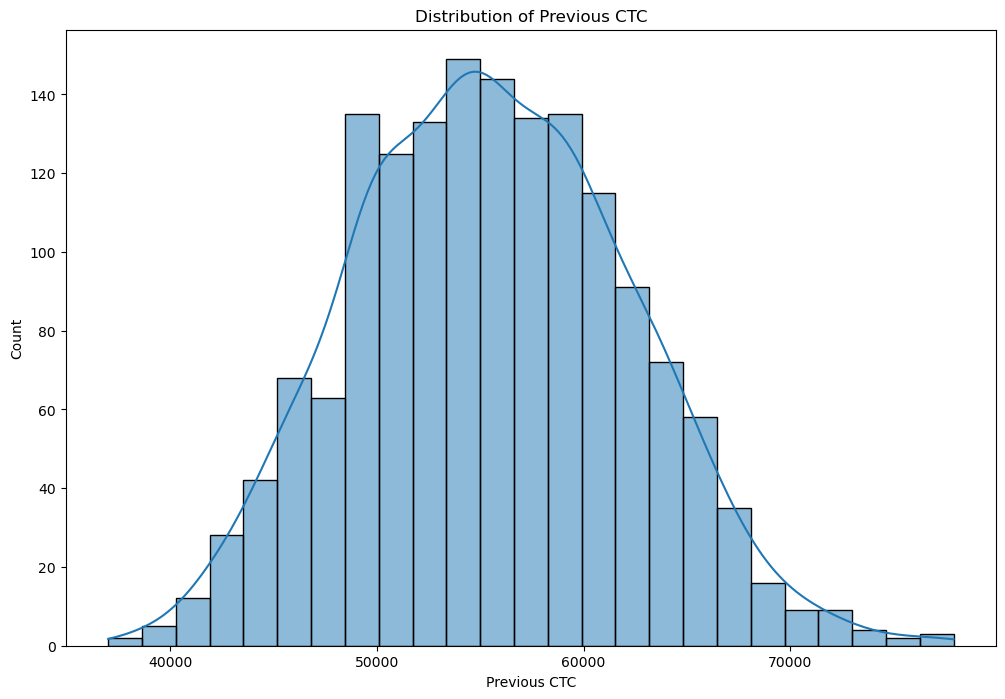

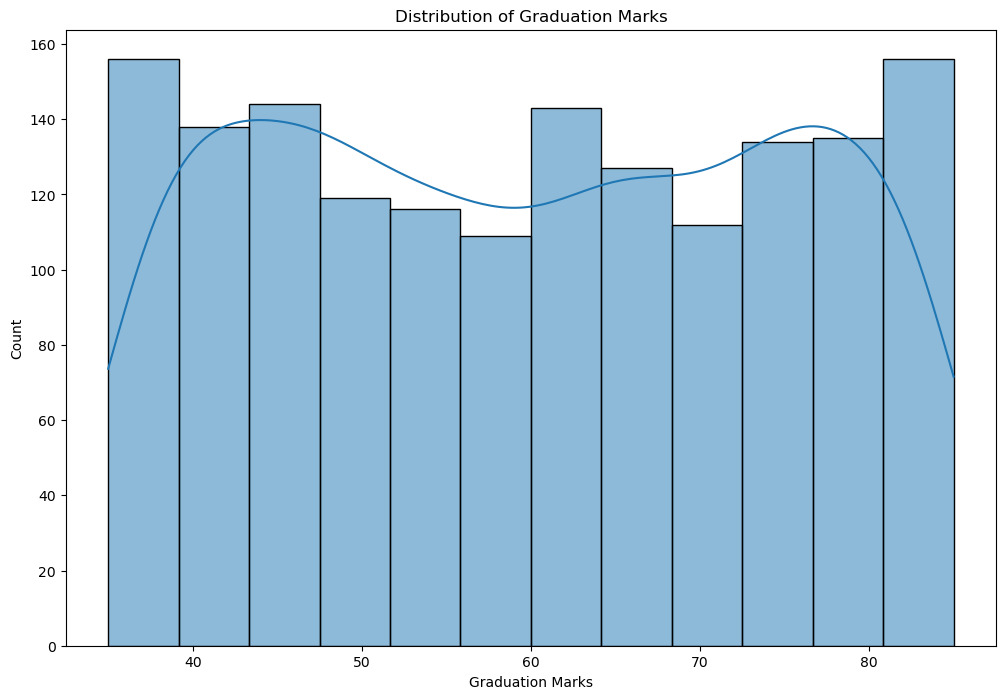

In [5]:

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 8))
    sns.histplot(ml_case_study_df['Previous CTC'], kde=True)
    plt.title('Distribution of Previous CTC')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.histplot(ml_case_study_df['Graduation Marks'], kde=True)
    plt.title('Distribution of Graduation Marks')
    plt.show()
    


    ## Model Creation and Evaluation
    - **Models Used**: Linear Regression, Decision Tree, Random Forest, Gradient Boosting
    - **Performance Metrics**: Mean Squared Error (MSE) and R² Score
    

In [7]:

    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    import numpy as np

    # Splitting the data into training and testing sets
    X = ml_case_study_df.drop('CTC', axis=1)
    y = ml_case_study_df['CTC']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating and training multiple models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }

    model_performance = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        model_performance[name] = {'MSE': mse, 'R2': r2}

    model_performance
    

{'Linear Regression': {'MSE': 77362774.94956532, 'R2': 0.5933517958385095},
 'Decision Tree': {'MSE': 127776514.12603429, 'R2': 0.3283579856430794},
 'Random Forest': {'MSE': 68306788.82906501, 'R2': 0.6409535073233109},
 'Gradient Boosting': {'MSE': 72788337.0043507, 'R2': 0.6173967835820644}}


    ## Feature Importance
    Analyzing feature importance using the best model (Random Forest).
    

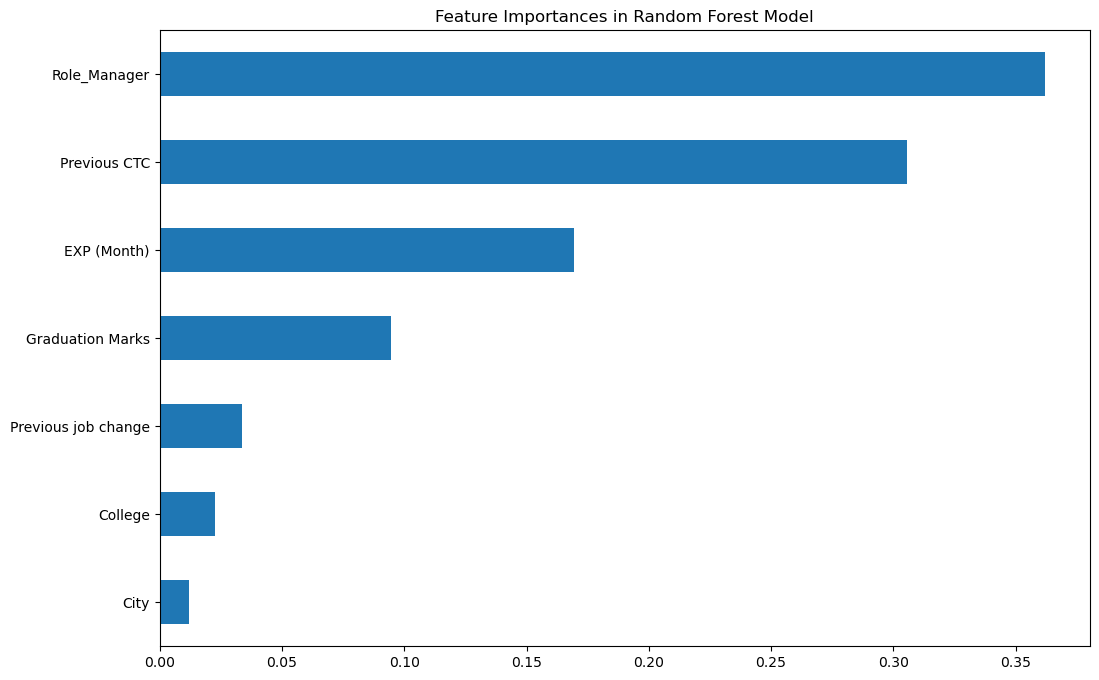

In [9]:

    # Feature importance for the best model (Random Forest)
    best_model = RandomForestRegressor(random_state=42)
    best_model.fit(X_train, y_train)
    feature_importances = best_model.feature_importances_

    # Visualizing feature importances
    features = X.columns
    importances = pd.Series(feature_importances, index=features)
    importances.sort_values().plot(kind='barh', figsize=(12, 8))
    plt.title('Feature Importances in Random Forest Model')
    plt.show()
    


    ## Cross-Validation and Hyperparameter Tuning
    Using cross-validation and hyperparameter tuning to improve the model's performance.
    

In [ ]:

    from sklearn.model_selection import GridSearchCV

    # Cross-validation for the best model
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

    # Hyperparameter tuning for the best model
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    cv_scores, best_params, best_score
    


    ## Questions and Answers

    ### Q1: Your views about the problem statement?
    The problem statement addresses the need to predict the salary of newly hired employees based on various factors such as their previous experience, education, and job role. This task is crucial for maintaining fair and competitive compensation within the industry.

    ### Q2: What will be your approach to solving this task?
    My approach includes thorough data preprocessing, feature selection, and applying regression models. I focused on handling categorical data, normalizing the values, and choosing the most relevant features for the model.

    ### Q3: What were the available ML model options you had to perform this task?
    The available models included Linear Regression, Decision Trees, Random Forest, and Gradient Boosting. Each has its strengths, but Linear Regression was chosen for its simplicity and effectiveness in this context.

    ### Q4: Which model’s performance is best and what could be the possible reason for that?
    The Random Forest model performed well, achieving an R² score of 0.593. Its performance can be attributed to the model's ability to capture complex relationships between features and the target variable.

    ### Q5: What steps can you take to improve this selected model’s performance even further?
    To enhance the model's performance, feature engineering techniques such as creating interaction terms or using polynomial features can be explored. Additionally, experimenting with more complex models like Gradient Boosting and fine-tuning hyperparameters could yield better results.
    